# **AIN 214 - PA5 - FALL 2024**




**Name Surname**   : Furkan Necati İnan


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 03.01.2025 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>



---


# **CLUSTERING**


This assignment aims to deepen your understanding of clustering algorithms and introduce the concept of dimensionality reduction using Principal Component Analysis (PCA). You will use K-Means and Agglomerative Clustering and explore the impact of PCA on these clustering techniques.

---
**Dataset Path:** "Data/wholesale_customers_data.csv"
---

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.

***Variables***

* FRESH: annual spending (m.u.) on fresh products (Continuous);
* MILK: annual spending (m.u.) on milk products (Continuous);
* GROCERY: annual spending (m.u.)on grocery products (Continuous);
* FROZEN: annual spending (m.u.)on frozen products (Continuous)
* DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
* DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
* CHANNEL: customers Channel - (Hotel/Restaurant/Cafe) (Nominal)
* REGION: customers Region  (Lisnon, Oporto or Other) (Nominal)




# **Necessary Imports**

In [814]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



# **PART- 1: Data Preprocessing and Visualization (20 Pts)**

---

## 1.1. Explaratory Data Analysis (10 Pts)

* Analyze  the dataset and explain analysis results
* Check and handle missing values and outliers
* Transform raw data into a format suitable for ML algorithms: PCA, and clustering, such as normalization.



In [817]:
# your code here
data_path = "Data/wholesale_customers_data.csv"
df = pd.read_csv(data_path)

print(df.head())



   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [818]:
print(df.isnull().sum())


Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


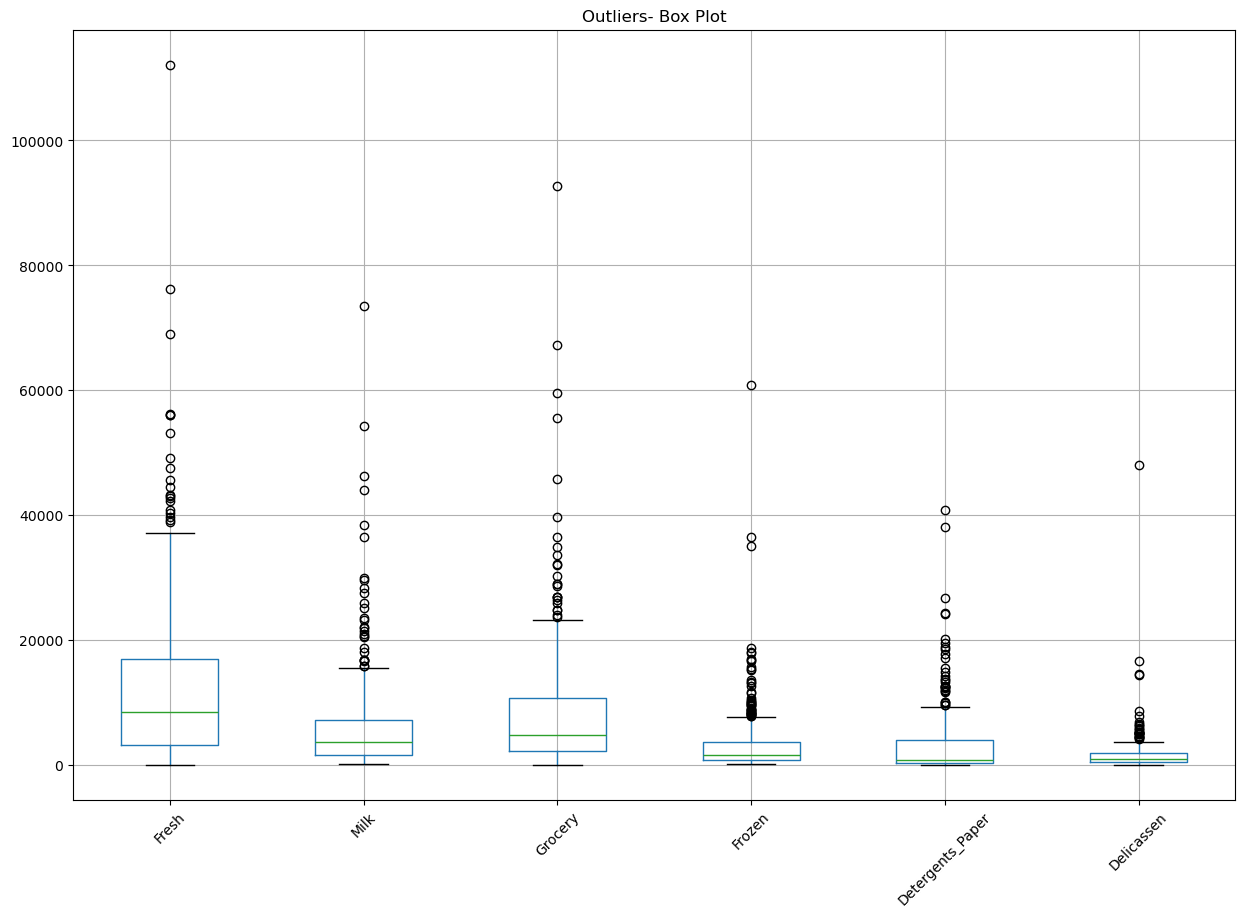

Number of outliers: 41
Total data: 440
Cleaned data:: 399
              Fresh          Milk       Grocery        Frozen  \
count    399.000000    399.000000    399.000000    399.000000   
mean   11046.077694   4303.859649   6089.621554   2680.804511   
std    10294.912298   3594.682012   5333.583816   3443.063320   
min        3.000000     55.000000      3.000000     25.000000   
25%     3092.000000   1432.000000   2064.500000    704.000000   
50%     8190.000000   3243.000000   4042.000000   1465.000000   
75%    16242.500000   6260.500000   8869.500000   3247.000000   
max    56083.000000  20655.000000  23596.000000  35009.000000   

       Detergents_Paper    Delicassen  
count        399.000000    399.000000  
mean        2053.175439   1209.583960  
std         2696.656594   1293.031201  
min            3.000000      3.000000  
25%          241.500000    395.000000  
50%          716.000000    834.000000  
75%         3398.000000   1642.000000  
max        17120.000000  14472.00000

In [819]:

numeric_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


def detect_outliers(df, features):
    outliers_indices = []
    
    for column in features:

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        

        outlier_step = 1.5 * IQR
        lower_bound = Q1 - outlier_step
        upper_bound = Q3 + outlier_step
        

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        outliers_indices.extend(outliers)
    

    outliers_indices = Counter(outliers_indices)
    multiple_outliers = [k for k, v in outliers_indices.items() if v > 1]
    
    return multiple_outliers


plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Outliers- Box Plot')
plt.xticks(rotation=45)
plt.show()


from collections import Counter
outliers_indices = detect_outliers(df, numeric_features)

print(f"Number of outliers: {len(outliers_indices)}")
print(f"Total data: {len(df)}")


df_cleaned = df.drop(outliers_indices, axis=0).reset_index(drop=True)

print(f"Cleaned data:: {len(df_cleaned)}")



print(df_cleaned[numeric_features].describe())



In [820]:
print(df.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

In [821]:
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_no_outliers[features])


df_scaled = pd.DataFrame(df_scaled, columns=features)


## 1.2. Data Visualization (10 Pts)

* Visualize the distribution of features
* Plot a correlation heatmap to analyze their relationships.
* Comment on any findings

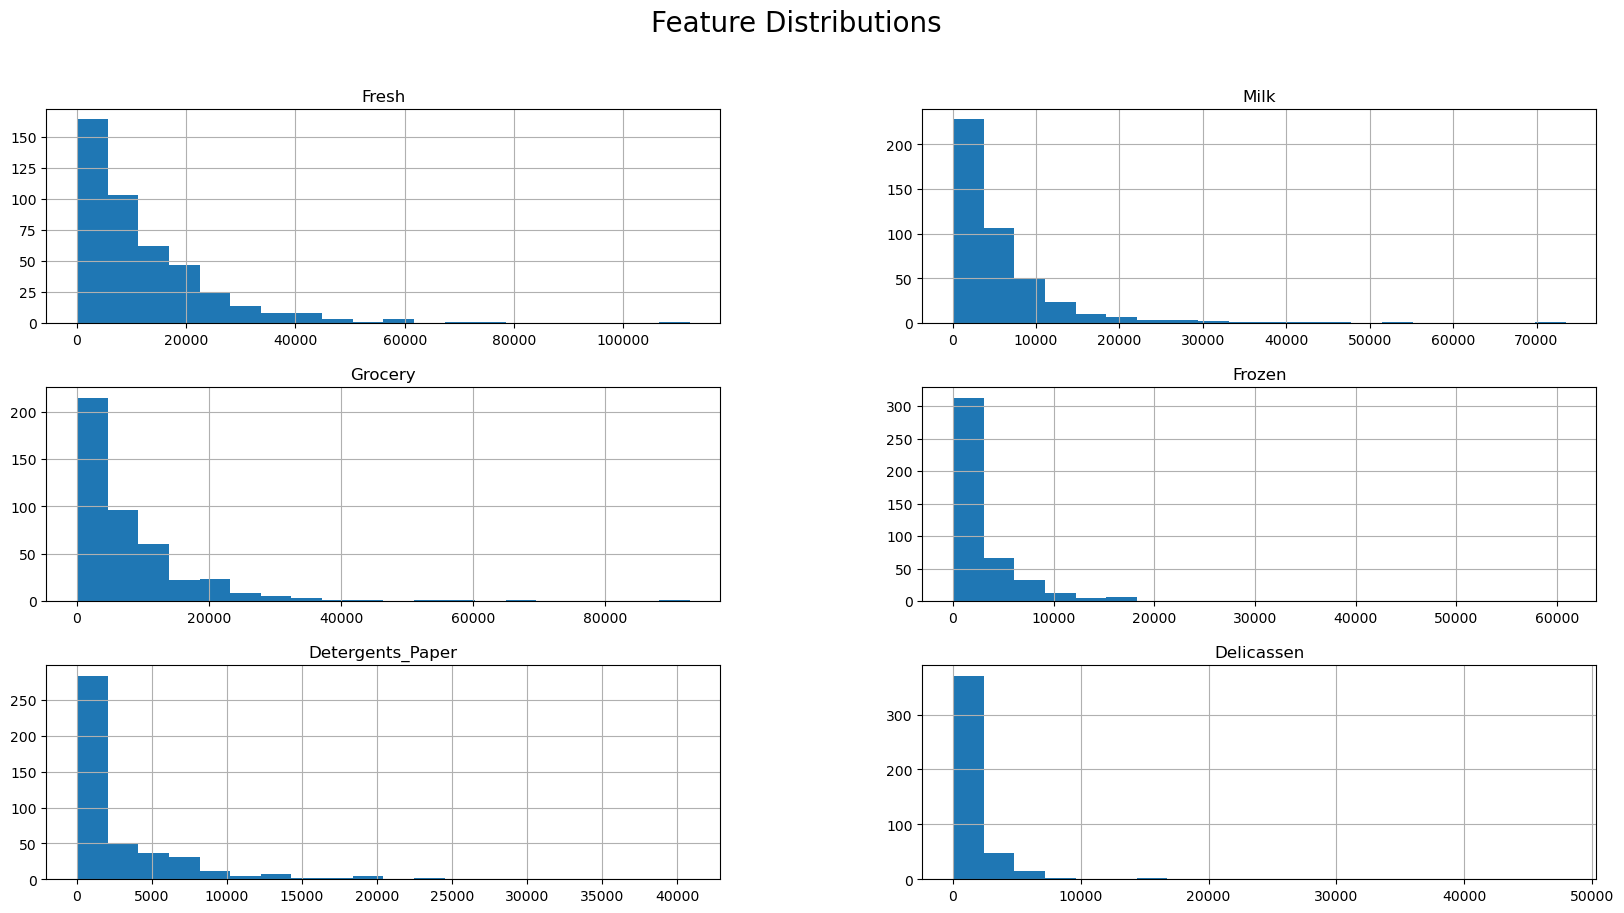

In [823]:
# your code here

df[features].hist(bins=20, figsize=(20, 10))
plt.suptitle("Feature Distributions", fontsize=20)
plt.show()


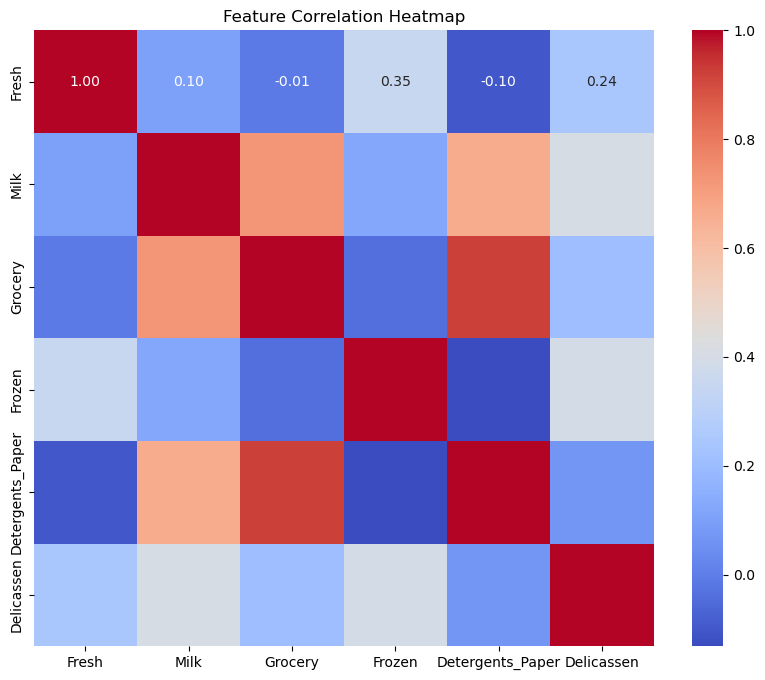

In [824]:

correlation_matrix = df[features].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()



1. Fresh has a low correlation with all other features (e.g., -0.01 with Grocery).
2. Milk and Grocery have a high positive correlation (0.77). 
3. Detergents_Paper shows a high correlation with Milk (0.66) and Grocery (0.73).
4. Frozen has low correlations with most features. 
5. Delicatessen has weak or moderate correlations with other features.


- Milk, Grocery, and Detergents_Paper behave similarly and are strongly related.
- Fresh and Frozen are more independent compared to other features.


# **PART- 2: Clustering on the Original Dataset (30 points)**



## 2.1 K-Means Clustering on the Original Dataset (15 points)

* Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

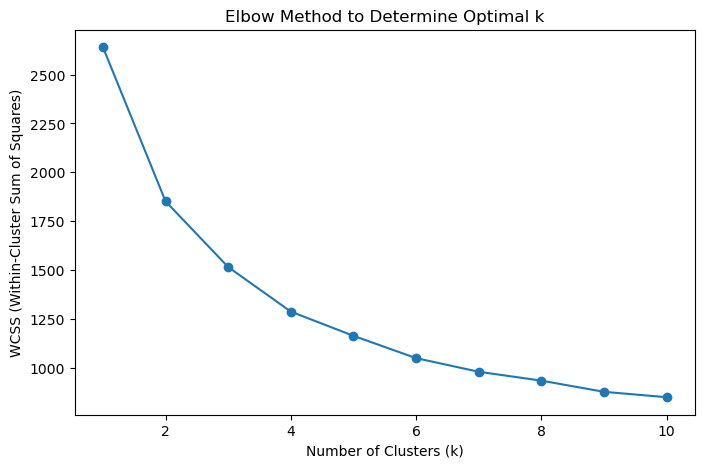

In [828]:
# your code here

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = df_scaled 

wcss = [] 
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  


plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


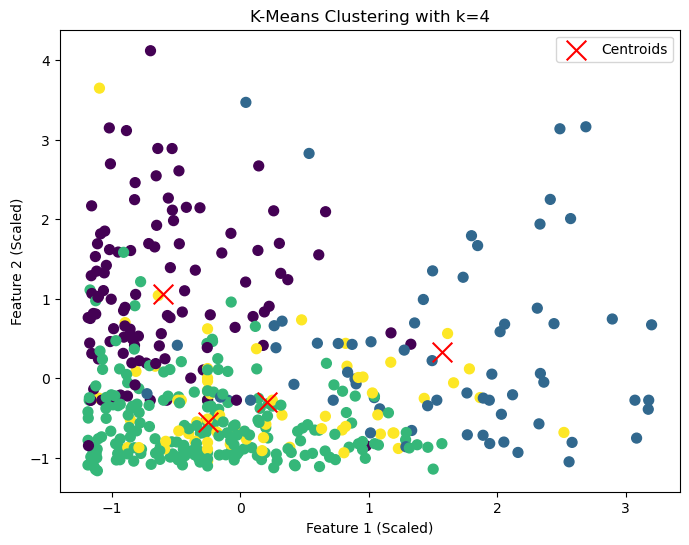

In [829]:

optimal_k = 4


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)


plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()


## 2.2. Hierarchical Agglomerative Clustering (HAC) on the Original Dataset (15 points)

* Apply HAC on the dataset, visualize the dendogram. Then, comment on whether the dendogram agrees with the clusters obtained by K-Means. Try with 2 different linkage methods.

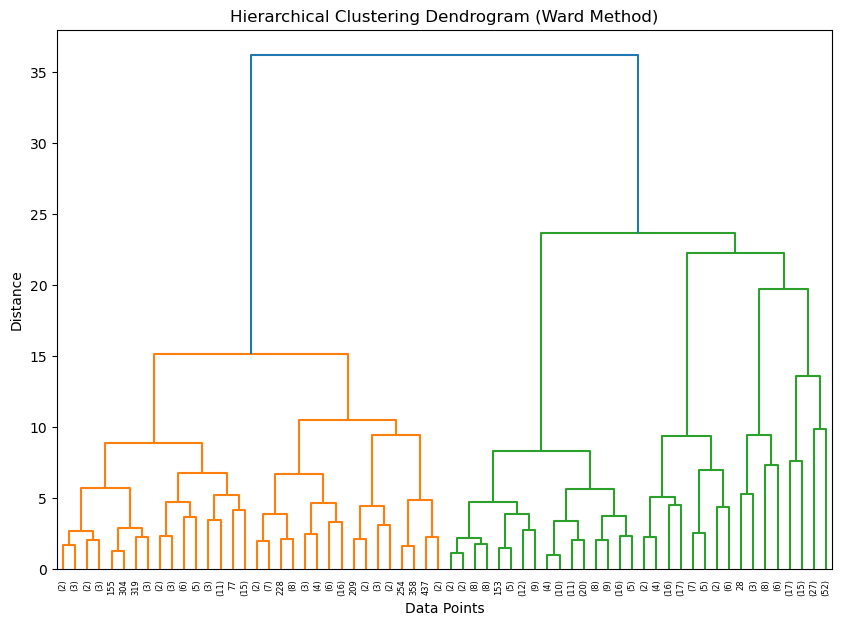

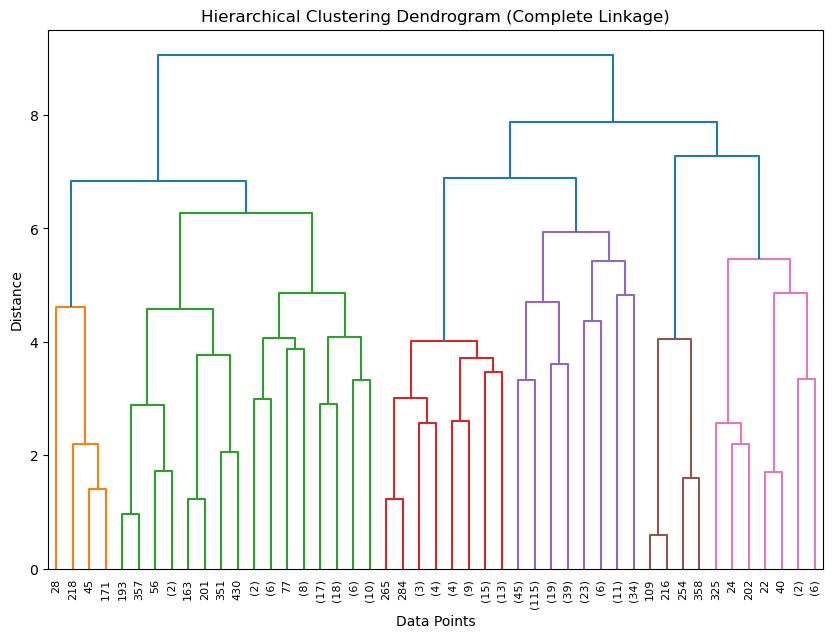

In [831]:
# your code here

from scipy.cluster.hierarchy import dendrogram, linkage


plt.figure(figsize=(10, 7))
Z = linkage(X, method='ward') 
dendrogram(Z, truncate_mode='level', p=5)  
plt.title("Hierarchical Clustering Dendrogram (Ward Method)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


plt.figure(figsize=(10, 7))
Z_complete = linkage(X, method='complete')
dendrogram(Z_complete, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()



# **PART- 3: Dimensionality Reduction (30 points)**

### *What is Dimensionality Reduction and Why is it Used?*

Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. It is an attempt to reduce the complexity of the task as an attempt to remove the curse of dimensionality - also for visualization purposes.

### *Principal Component Analysis (PCA)*

PCA is a technique that transforms original correlated features into new uncorrelated features (principal components) based on variance. **Process:**

* **Linear Combinations of Features:** PCA begins by creating linear combinations of the existing features in the dataset.
* **First Principal Component:** The first principal component (PC1) is the linear combination that captures the highest variance in the dataset. Mathematically, this is the direction in which the data varies the most.
* **Subsequent Principal Components:** Each following principal component is the linear combination of features that captures the highest variance possible while being orthogonal (perpendicular) to all previously determined principal components. This ensures that each new principal component adds unique information.
* **Covariance Matrix and Eigenvectors:** The process of finding these principal components corresponds to computing the eigenvectors of the covariance matrix of the data. The covariance matrix encapsulates how each pair of variables in the dataset co-varies.
* **Eigenvalues:** The eigenvalues associated with each eigenvector (principal component) indicate the amount of variance that the principal component explains. Larger eigenvalues mean more variance explained.


***You can use scikit-learn***




## 3.1. Apply PCA (15 Pts)

* Normalize the data
* Apply PCA to the normalized data using scikit-learn
* Visualize the data with the first two principal components (PC) as the axes. Do you see any clusters?
* Components selection: Visualize the variance explained by each PC. Then choose the number of components that explain the data sufficiently enough.
* Comment on any findings

In [834]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_normalized = scaler.fit_transform(df[features])  


/var/folders/lm/3vlk3_nd4cg0rx_1zvmg3swm0000gn/T/ipykernel_88952/3010813698.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis', s=50)


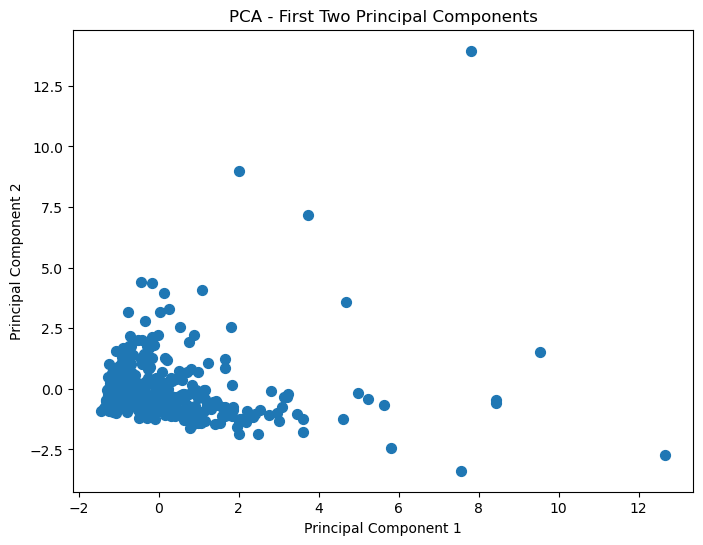

In [835]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis', s=50)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


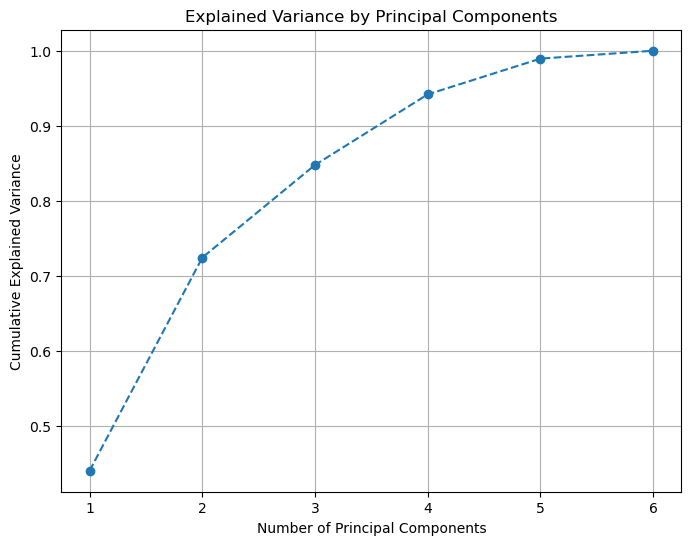

In [836]:

pca_full = PCA()
pca_full.fit(X_normalized)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


### Findings from the PCA Plots

1. **Scatter Plot of PCA Components**:
   - The data is spread across the first two principal components.
   - The majority of the data points are clustered near the origin, with some outliers spread further along the Principal Component 1 axis.
   - This suggests that most of the variance in the data is explained near the center, while a few data points might be responsible for higher variance.


2. **Explained Variance by Principal Components**:
   - The first two components explain most of the variance, as evident from the steep rise in the cumulative explained variance.
   - After 3 components, the curve starts to flatten, indicating diminishing returns in explained variance for additional components.
   - Selecting the first 2 or 3 components might be sufficient for a dimensionality reduction approach while retaining most of the data's information.


## 3.2. K-means Clustering with PCA (15 Pts)
* Choose the optimal k using the Elbow method. Then, visualize the resulting clusters with that k.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

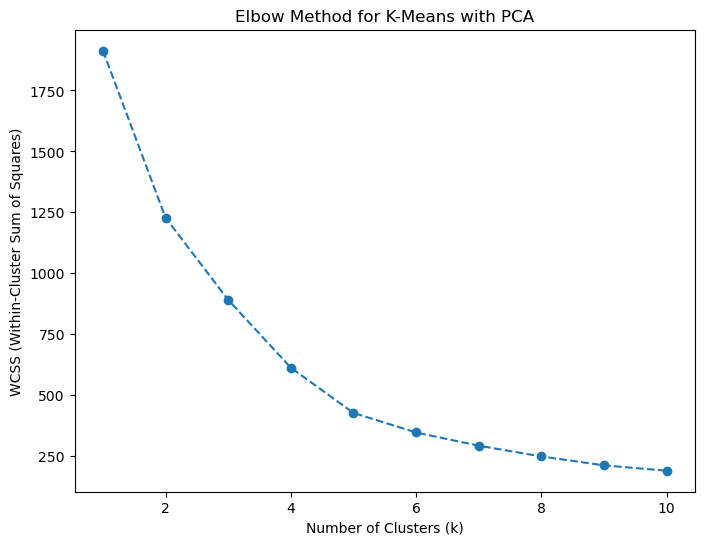

In [839]:
# your code here

wcss_pca = []  
k_values = range(1, 11)

for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(X_pca)
    wcss_pca.append(kmeans_pca.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_pca, marker='o', linestyle='--')
plt.title('Elbow Method for K-Means with PCA')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


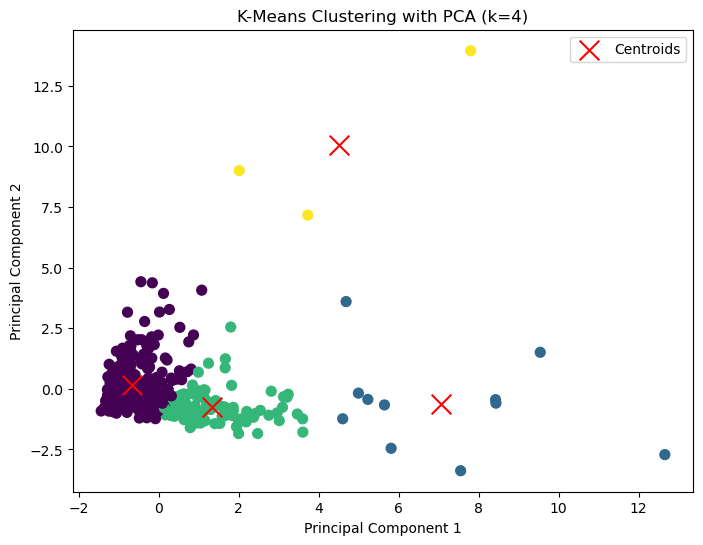

In [840]:

optimal_k = 4


kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca_labels, cmap='viridis', s=50)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title(f'K-Means Clustering with PCA (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



# **PART- 4: Evaluate the Clustering Results (20 points)**

* Evaluate and compare the clustering results (k means with and without PCA) using the Silhouette Coefficients.

* Identify which clustering method and dataset version (original vs. PCA-reduced) resulted in the best clustering.

* Discuss the impact of dimensionality reduction (PCA) on clustering performance.

* Highlight any differences in performance between K-Means and Agglomerative Clustering.

In [843]:
# your code here

from sklearn.metrics import silhouette_score


silhouette_kmeans_original = silhouette_score(X, kmeans.labels_)

print(f"Silhouette Coefficient for K-Means (Original Data): {silhouette_kmeans_original:.4f}")


Silhouette Coefficient for K-Means (Original Data): 0.3125


In [844]:

silhouette_kmeans_pca = silhouette_score(X_pca, kmeans_pca.labels_)

print(f"Silhouette Coefficient for K-Means (PCA Data): {silhouette_kmeans_pca:.4f}")


Silhouette Coefficient for K-Means (PCA Data): 0.4888


In [845]:
from sklearn.cluster import AgglomerativeClustering


hac = AgglomerativeClustering(n_clusters=4)
hac_labels = hac.fit_predict(X)


silhouette_hac_original = silhouette_score(X, hac_labels)
print(f"Silhouette Coefficient for HAC (Original Data): {silhouette_hac_original:.4f}")


Silhouette Coefficient for HAC (Original Data): 0.2083


In [846]:

hac_pca = AgglomerativeClustering(n_clusters=4)
hac_pca_labels = hac_pca.fit_predict(X_pca)


silhouette_hac_pca = silhouette_score(X_pca, hac_pca_labels)
print(f"Silhouette Coefficient for HAC (PCA Data): {silhouette_hac_pca:.4f}")


Silhouette Coefficient for HAC (PCA Data): 0.4394


### Evaluation and Comparison of Clustering Results

#### **Silhouette Scores**

| Method                   | Dataset            | Silhouette Coefficient |
|--------------------------|--------------------|------------------------|
| **K-Means**              | Original Data      | **0.3125**             |
| **K-Means**              | PCA-Reduced Data   | **0.4888**             |
| **Agglomerative Clustering** | Original Data      | **0.2083**             |
| **Agglomerative Clustering** | PCA-Reduced Data   | **0.4394**             |

---

### **Analysis**

1. **K-Means vs Agglomerative Clustering**  
   - **K-Means** performs better than Agglomerative Clustering in both original and PCA-reduced datasets.  
   - K-Means achieves the highest Silhouette Score (**0.4888**) with PCA-reduced data.

2. **Impact of PCA on Clustering**  
   - PCA significantly improves clustering results for both methods.  
   - K-Means score increased from **0.3125** to **0.4888**.  
   - Agglomerative Clustering score improved from **0.2083** to **0.4394**.

3. **Dimensionality Reduction**  
   - PCA effectively reduces dimensions while preserving important variance.  
   - Clusters become more distinguishable, improving the clustering performance.

---

### **Conclusion**

- **Best Result**: K-Means with PCA-reduced data (**0.4888**).  
- **PCA Impact**: PCA enhances clustering performance by simplifying the dataset.  
- **Method Comparison**: K-Means outperforms Agglomerative Clustering for this dataset in terms of clustering quality.


# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw5.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.